## This notebook is now demonstrating use of the functions in custom_ts_length module

In [24]:
import sys
print(sys.executable)

import pandas as pd
import os
from pathlib import Path
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import seaborn as sns
import yasa
import glob
import time
import joblib
import custom_ts_length

/export/sphere/ebirah/ko20929/miniconda3/envs/rbd_2clone/bin/python


In [11]:
df = joblib.load('N1_ts_new_method.pkl')
df.head()

,Delta_Central,Theta_Central,Alpha_Central,Sigma_Central,Beta_Central,Gamma_Central,TotalAbsPow_Central,Delta_Frontal,Theta_Frontal,Alpha_Frontal,...,Delta_Right Temporal,Theta_Right Temporal,Alpha_Right Temporal,Sigma_Right Temporal,Beta_Right Temporal,Gamma_Right Temporal,TotalAbsPow_Right Temporal,label,night,p_id
0,0 0.206463 1 0.237965 2 0.376795 3...,0 0.365065 1 0.314312 2 0.267725 3...,0 0.179510 1 0.218817 2 0.134259 3...,0 0.083829 1 0.100014 2 0.073213 3...,0 0.140192 1 0.109644 2 0.113057 3...,0 0.024942 1 0.019248 2 0.034950 3...,0 33.744106 1 37.965481 2 31.19713...,0 0.159243 1 0.202743 2 0.322644 3...,0 0.367168 1 0.341745 2 0.296872 3...,0 0.195099 1 0.217064 2 0.118656 3...,...,0 0.182083 1 0.243609 2 0.327707 3...,0 0.520947 1 0.383851 2 0.336803 3...,0 0.152361 1 0.217245 2 0.175784 3...,0 0.055319 1 0.066599 2 0.068571 3...,0 0.072899 1 0.076622 2 0.074257 3...,0 0.016391 1 0.012073 2 0.016878 3...,0 46.042871 1 44.133174 2 38.04688...,HC,Night 2,1101
1,0 0.251578 1 0.430376 2 0.384302 3...,0 0.288368 1 0.232595 2 0.255250 3...,0 0.184528 1 0.116658 2 0.131367 3...,0 0.109193 1 0.074452 2 0.080348 3...,0 0.137786 1 0.107118 2 0.111588 3...,0 0.028548 1 0.038800 2 0.037145 3...,0 35.365297 1 35.520710 2 28.47962...,0 0.206781 1 0.387620 2 0.322921 3...,0 0.316349 1 0.228500 2 0.273575 3...,0 0.208402 1 0.124834 2 0.158635 3...,...,0 0.323355 1 0.400265 2 0.371003 3...,0 0.284909 1 0.284516 2 0.261681 3...,0 0.181070 1 0.112016 2 0.163492 3...,0 0.090145 1 0.079643 2 0.078771 3...,0 0.096154 1 0.091632 2 0.093308 3...,0 0.024367 1 0.031927 2 0.031744 3...,0 30.140159 1 27.224828 2 24.92562...,HC,Night 3,1101
2,0 0.353417 1 0.373625 2 0.378958 3...,0 0.410526 1 0.343385 2 0.414261 3...,0 0.133595 1 0.154534 2 0.110210 3...,0 0.039631 1 0.062692 2 0.054658 3...,0 0.055683 1 0.059143 2 0.037400 3...,0 0.007147 1 0.006621 2 0.004513 3...,0 34.705527 1 52.109617 2 62.74763...,0 0.462253 1 0.408498 2 0.486007 3...,0 0.331589 1 0.308551 2 0.296162 3...,0 0.094388 1 0.127500 2 0.100776 3...,...,0 0.469095 1 0.522989 2 0.478231 3...,0 0.323526 1 0.278995 2 0.372259 3...,0 0.120260 1 0.130617 2 0.089582 3...,0 0.027764 1 0.027569 2 0.029634 3...,0 0.042973 1 0.031698 2 0.024095 3...,0 0.016381 1 0.008133 2 0.006200 3...,0 17.904127 1 26.844822 2 24.66099...,HC,Night 2,1102
3,0 0.435495 1 0.528607 2 0.387177 3 ...,0 0.229867 1 0.255268 2 0.307399 3 ...,0 0.198341 1 0.124197 2 0.169887 3 ...,0 0.052787 1 0.049788 2 0.051276 3 ...,0 0.073864 1 0.036131 2 0.074501 3 ...,0 0.009646 1 0.006010 2 0.009759 3 ...,0 40.899733 1 44.396558 2 41.149157 3...,0 0.486410 1 0.512782 2 0.382642 3 ...,0 0.231935 1 0.284668 2 0.349780 3 ...,0 0.171379 1 0.136058 2 0.157751 3 ...,...,0 0.412652 1 0.529029 2 0.359788 3 ...,0 0.277982 1 0.237492 2 0.384700 3 ...,0 0.203814 1 0.160425 2 0.170614 3 ...,0 0.047082 1 0.039734 2 0.039208 3 ...,0 0.051505 1 0.028372 2 0.037269 3 ...,0 0.006965 1 0.004949 2 0.008422 3 ...,0 47.576934 1 43.191771 2 55.806132 3...,HC,Night 1,1103
4,0 0.352381 1 0.504478 2 0.607887 3 ...,0 0.279094 1 0.290525 2 0.219083 3 ...,0 0.202894 1 0.116794 2 0.106370 3 ...,0 0.057536 1 0.038609 2 0.036631 3 ...,0 0.096691 1 0.042134 2 0.025943 3 ...,0 0.011404 1 0.007459 2 0.004087 3 ...,0 26.455148 1 45.114224 2 71.105139 3...,0 0.316147 1 0.513450 2 0.590726 3 ...,0 0.323403 1 0.283863 2 0.236648 3 ...,0 0.202976 1 0.115217 2 0.112872 3 ...,...,0 0.412552 1 0.470354 2 0.474014 3 ...,0 0.286171 1 0.254187 2 0.279479 3 ...,0 0.189208 1 0.198413 2 0.172915 3 ...,0 0.041617 1 0.037608 2 0.045172 3 ...,0 0.059134 1 0.034188 2 0.024874 3 ...,0 0.011317 1 0.005251 2 0.003547 3 ...,0 59.326350 1 44.609521 2 59.081896 3...,HC,Night 2,1103


<AxesSubplot:>

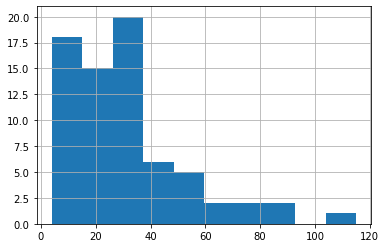

In [17]:
#Use function to calculate ts_length then plot histogram of the time series lengths
custom_ts_length.add_ts_length(df).ts_length.hist()

In [16]:
#Check that time series in every row are of equal length
custom_ts_length.check_ts_lengths(df)

'pass'

<AxesSubplot:>

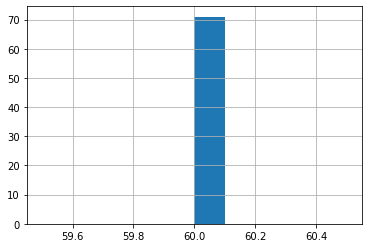

In [23]:
#From eye balling the graph '60' seems like an ok length to make use of information in longer length time series and to not
#Disrupt the shorter time series too much
#This cell uses function to make every TS in the dataframe have length 60 
df_custom = custom_ts_length.customise_df_ts_length(df.iloc[:,:91], 60)

#Check the new lengths using histogram
custom_ts_length.add_ts_length(df_custom).ts_length.hist()